In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tol = 0.000001
N = 1000

#Biseccion

In [ ]:
'''Esta funcion implementa el metodo de la biseccion
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
a:   limite inferior del rango inicial
b:   limite superior del rango inicial
'''
def biseccion(f,Tol,N,a,b):
    fa, fb = f(a), f(b)
    #no hay un cambio de signo (teorema del valor medio)
    #no existe raiz en el intervalo [a,b]
    if fa*fb>0:
        print ("no hay raiz en [a,b]")
        return [None, None]
    #contador de iteraciones    
    n=1
    x0=0.0
    #mientras no se exceda el numero de iteraciones
    while n<=N:
        #se busca la raiz en el punto medio
        x1=(a+b)/2.0
        fx=f(x1)
        #en caso de que la iteracion siguiente y la diferencia
        #entre la iteracion anterior no excedan Tol, entonces
        #la iteracion actual se aproxima a la solucion buscada
        if abs(f(x1)) <= Tol and abs(x1-x0) <= Tol:
            return x1,n
        #en caso de no cumplir el criterio de tolerancia
        #se actualiza el rango de busqueda
        if (fa*fx <0.0):
            b=x1 
        if (fx*fa >0.0):      
            a=x1
        x0=x1
        #se incrementa el contador de iteraciones
        n=n+1

#Falsa posicion

In [ ]:
'''Esta funcion implementa el metodo de la falsa posicion
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
a:   limite inferior del rango inicial
b:   limite superior del rango inicial
'''
def falsaPosicion(f,Tol,N,a,b):
    fa=f(a)
    fb=f(b)
    #en caso de que no haya cambio de signo, no existe raiz
    if fa*fb>0:
        print("No existe raíz en [a,b]")
        return [None, None]
    #contador de iteraciones
    n=1
    #se toma una raiz inicial arbitraria   
    x0=0.0
    #mientras no se exceda el numero de iteraciones
    while n<=N:
        #se actualiza el rango de busqueda
        fa,fb =f(a),f(b)
        #se calcula la nueva iteracion
        x1= (a*fb-b*fa)/(fb-fa)
        fx=f(x1)
        #en caso de que la diferencia entre la iteracion actual
        #y la iteracion anterior no excedan Tol, y que la raiz
        #evaluada no exceda la tolerancia, se devuelve la raiz
        if abs(f(x1)) <= Tol and abs(x1-x0) <= Tol:
            return x1,n
        #en caso de no cumplir el criterio de tolerancia
        #se actualiza el rango de busqueda
        if (fa*fx <0.0):
            b=x1 
        if (fx*fa >0.0):      
            a=x1
        #se actualiza x0
        x0=x1
        #se incrementa el contador de iteraciones
        n=n+1

#Secante

In [ ]:
'''Esta funcion implementa el metodo de la secante
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
x0:  aproximacion inicial
x1: aproximacion siguiente
'''
def secante(f, Tol, N, x0, x1):
    #contador de iteraciones
    n = 1
    #mientras no se haya superado el limite de iteraciones
    while( N >= n ):
        #calculo de los valores de fx
        fx0,fx1=f(x0),f(x1)
        #se calcula la siguiente aproximacion
        xn = x1-fx1*((x1-x0)/float(fx1-fx0))
        #en caso de que se cumplan los criteros de paro
        #se devuelve la raiz
        if (abs(f(xn)) <= Tol and abs(x0-x1) <= Tol):
            return xn , n
        #se actualizan los valores    
        x0 = x1
        x1 = xn
        #incremento en las iteraciones
        n+=1
    raise Exception("Se alcanzo el maximo numero de iteraciones y no se encontro raiz")

#Newton

In [ ]:
'''Esta funcion implementa el metodo de la falsa posicion
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
df:  derivada de f
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
x0:  aproximacion inicial
'''
def newton(f,df,Tol,N,x0):
    #contador de iteraciones
    n=1
    #mientras no se haya superado el limite de iteraciones
    while n<=N:
        #se evalua la funcion y su derivada
        fx=f(x0)
        dfx=df(x0)
        #se calcula la siguiente aproximacion
        xn = x0-(fx/float(dfx))
        #en caso de cumplir criterios se devuelve la raiz
        if abs(f(xn)) <= Tol and abs(xn-x0) <= Tol:
            return xn,n
        #actualizamos las aproximaciones
        x0 = xn
        #se incrementa el contador de iteraciones    
        n=n+1
    raise Exception("Se alcanzo el maximo numero de iteraciones y no se encontro raiz")



#Funciones

In [ ]:
def f_1(x):
  return (3*(np.sin(x)))+2

def df_1(x):
  return 3*np.cos(x)

def f_2(x):
  return 2-np.exp(x)+np.log10(x)

def df_2(x):
  return 1/(x*np.log(10))-np.exp(x)

def f_3(x):
  return np.log(x+1)-x+1

def df_3(x):
  return (1/(x+1)) - 1

In [ ]:
def grafIt(listaIt, funcion):
  listaMet = ["Bisección", "Falsa Posición", "Secante", "Newton"]
  plt.style.use("ggplot")
  fig = plt.figure(figsize = (10, 5))
  plt.bar(listaMet, listaIt)
  plt.xlabel("Métodos")
  plt.ylabel("Iteraciones")
  plt.suptitle("Iteraciones por Método", fontsize = 18)
  plt.title(funcion, fontsize = 16)
  plt.show


#Aproximaciones

Funcion $f(x) = 3\sin(x)+2$

In [ ]:
#biseccion 
print(" ")
print("biseccion ")
print('Aproximacion', "     Numero de iteraciones" )
print(biseccion(f_1,tol,N,0,5)[0] ,"   ",biseccion(f_1,tol,N,0,5)[1] )
print(biseccion(f_1,tol,N,5,9)[0] ,"   ",biseccion(f_1,tol,N,5,9)[1] )

#Falsa posicion 
print(" ")
print("Falsa posicion")
print('Aproximacion', "     Numero de iteraciones" )
print(falsaPosicion(f_1,tol,N,0,5)[0] ,"   ",falsaPosicion(f_1,tol,N,0,5)[1] )
print(falsaPosicion(f_1,tol,N,5,9)[0] ,"   ",falsaPosicion(f_1,tol,N,5,9)[1] )

#Secante
print(" ")
print("Secante")
print('Aproximacion', "     Numero de iteraciones" )
print(secante(f_1,tol,N,0,5)[0] ,"   ",secante(f_1,tol,N,0,5)[1] )
print(secante(f_1,tol,N,5,9)[0] ,"   ",secante(f_1,tol,N,5,9)[1] )

#Newton
print(" ")
print("Newton")
print('Aproximacion', "     Numero de iteraciones" )
print(newton(f_1,df_1,tol,N,3)[0] ,"   ",newton(f_1,df_1,tol,N,3)[1] )
print(newton(f_1,df_1,tol,N,5)[0] ,"   ",newton(f_1,df_1,tol,N,3)[1] )



 
biseccion 
Aproximacion      Numero de iteraciones
3.871319890022278     23
5.553457736968994     23
 
Falsa posicion
Aproximacion      Numero de iteraciones
3.8713203603650324     10
5.553457636165346     9
 
Secante
Aproximacion      Numero de iteraciones
3.8713203098167597     9
5.553457650952621     9
 
Newton
Aproximacion      Numero de iteraciones
3.87132030981654     4
5.55345765095268     4


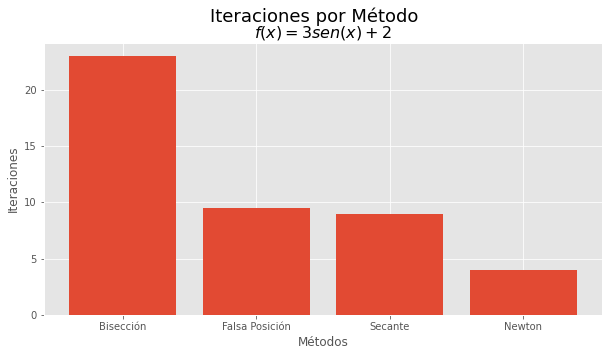

In [ ]:
# Bisección

it_bis_1 = (biseccion(f_1,tol,N,0,5)[1] + biseccion(f_1,tol,N,5,9)[1]) / 2

# Falsa posición

it_fp_1 = (falsaPosicion(f_1,tol,N,0,5)[1] + falsaPosicion(f_1,tol,N,5,9)[1])/2

# Secante

it_sec_1 = (secante(f_1,tol,N,0,5)[1] + secante(f_1,tol,N,5,9)[1]) / 2

# Newton 

it_newt_1 = (newton(f_1,df_1,tol,N,3)[1] + newton(f_1,df_1,tol,N,3)[1]) / 2

# Lista Iteraciones por método

listaMet_1 = [it_bis_1, it_fp_1, it_sec_1, it_newt_1]

#Gráfica

grafIt(listaMet_1, '$f(x)=3sen(x)+2$')

Funcion $f(x) = 2-e^x + log_{10}(x)$


In [ ]:
#biseccion 
print(" ")
print("biseccion ")
print('Aproximacion', "     Numero de iteraciones" )
print(biseccion(f_2,tol,N,0,0.5)[0] ,"   ",biseccion(f_2,tol,N,0,0.5)[1] )
print(biseccion(f_2,tol,N,0.5,1)[0] ,"   ",biseccion(f_2,tol,N,0.5,1)[1] )

#Falsa posicion 
print(" ")
print("Falsa posicion")
print('Aproximacion', "     Numero de iteraciones" )
print(falsaPosicion(f_2,tol,N,0.05,0.5)[0] ,"   ",falsaPosicion(f_2,tol,N,0.05,0.5)[1] )
print(falsaPosicion(f_2,tol,N,0.5,1)[0] ,"   ",falsaPosicion(f_2,tol,N,0.5,1)[1] )


#Secante
print(" ")
print("Secante")
print('Aproximacion', "     Numero de iteraciones" )
print(secante(f_2,tol,N,0.1,0.4)[0] ,"   ",secante(f_2,tol,N,0.1,0.4)[1] )
print(secante(f_2,tol,N,0.5,1)[0] ,"   ",secante(f_2,tol,N,0.5,1)[1] )

#Newton
print(" ")
print("Newton")
print('Aproximacion', "     Numero de iteraciones" )
print(newton(f_2,df_2,tol,N,0.05)[0] ,"   ",newton(f_2,df_2,tol,N,0.05)[1] )
print(newton(f_2,df_2,tol,N,2)[0] ,"   ",newton(f_2,df_2,tol,N,2)[1] )


 
biseccion 
Aproximacion      Numero de iteraciones
0.1421518325805664     19
0.5574407577514648     19
 
Falsa posicion
Aproximacion      Numero de iteraciones
0.1421517838611691     22
0.5574411823378016     13
 
Secante
Aproximacion      Numero de iteraciones
0.14215141082218996     15
0.5574416736273567     7
 
Newton
Aproximacion      Numero de iteraciones
0.14215141082218996     6
0.5574416736273569     7


<ipython-input-51-055605aac72d>:8: RuntimeWarning: divide by zero encountered in log10
  return 2-np.exp(x)+np.log10(x)


<ipython-input-51-055605aac72d>:8: RuntimeWarning: divide by zero encountered in log10
  return 2-np.exp(x)+np.log10(x)


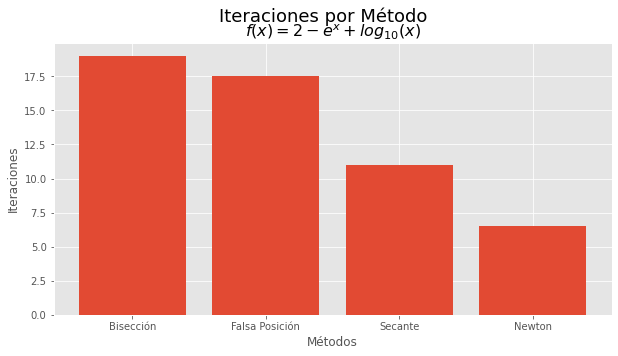

In [ ]:
# Bisección

it_bis_2 = (biseccion(f_2,tol,N,0,0.5)[1] + biseccion(f_2,tol,N,0.5,1)[1])/2

# Falsa posición

it_fp_2 = (falsaPosicion(f_2,tol,N,0.05,0.5)[1] + falsaPosicion(f_2,tol,N,0.5,1)[1])/2

# Secante

it_sec_2 = (secante(f_2,tol,N,0.1,0.4)[1] + secante(f_2,tol,N,0.5,1)[1] )/2

# Newton 

it_newt_2 = (newton(f_2,df_2,tol,N,0.05)[1] + newton(f_2,df_2,tol,N,2)[1])/2

# Lista Iteraciones por método

listaMet_2 = [it_bis_2, it_fp_2, it_sec_2, it_newt_2]

#Gráfica

grafIt(listaMet_2, '$f(x)=2-e^x+log_{10}(x)$')

Funcion $f(x) = ln(x+1)-x+1$

In [ ]:
#biseccion 
print(" ")
print("Biseccion ")
print('Aproximacion', "     Numero de iteraciones" )
print(biseccion(f_3,tol,N,0,5)[0] ,"   ",biseccion(f_3,tol,N,0,5)[1] )
print(biseccion(f_3,tol,N,-.9,0)[0] ,"   ",biseccion(f_3,tol,N,-.9,0)[1] )

#Falsa posicion 
print(" ")
print("Falsa posicion")
print('Aproximacion', "     Numero de iteraciones" )
print(falsaPosicion(f_3,tol,N,0,5)[0] ,"   ",falsaPosicion(f_3,tol,N,0,5)[1] )
print(falsaPosicion(f_3,tol,N,-.9,-.5)[0] ,"   ",falsaPosicion(f_3,tol,N,-.9,-.5)[1] )

#Secante
print(" ")
print("Secante")
print('Aproximacion', "     Numero de iteraciones" )
print(secante(f_3,tol,N,0,5)[0] ,"   ",secante(f_1,tol,N,0,5)[1] )
print(secante(f_3,tol,N,-.9,-.5)[0] ,"   ",secante(f_1,tol,N,-.9,-.5)[1] )

#Newton
print(" ")
print("Newton")
print('Aproximacion', "    ", "Numero de iteraciones" )
print(newton(f_3,df_3,tol,N,20)[0] ,"   ",newton(f_3,df_3,tol,N,20)[1] )
print(newton(f_3,df_3,tol,N,-.64)[0] ,"   ",newton(f_3,df_3,tol,N,-.64)[1] )
# Notemos que cualquier aproximacion inicial fuera de (-1,-.63) hace que el 
# método no converja


 
Biseccion 
Aproximacion      Numero de iteraciones
2.1461933851242065     23
-0.8414055347442626     21
 
Falsa posicion
Aproximacion      Numero de iteraciones
2.146193193435734     9
-0.8414055414838054     10
 
Secante
Aproximacion      Numero de iteraciones
2.1461932206205825     9
-0.8414056604369606     6
 
Newton
Aproximacion      Numero de iteraciones
2.1461932206205825     5
-0.8414056604369606     8


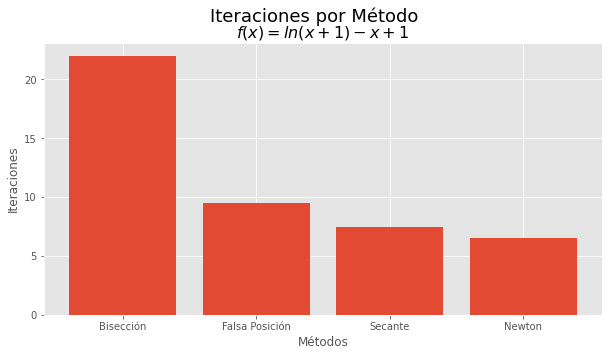

In [ ]:
# Bisección

it_bis_3 = (biseccion(f_3,tol,N,0,5)[1] + biseccion(f_3,tol,N,-.9,0)[1]) / 2

# Falsa posición

it_fp_3 = (falsaPosicion(f_3,tol,N,0,5)[1] + falsaPosicion(f_3,tol,N,-.9,-.5)[1]) / 2

# Secante

it_sec_3 = (secante(f_1,tol,N,0,5)[1] + secante(f_1,tol,N,-.9,-.5)[1]) / 2

# Newton 

it_newt_3 = (newton(f_3,df_3,tol,N,20)[1] + newton(f_3,df_3,tol,N,-.64)[1]) / 2

# Lista Iteraciones por método

listaMet_3 = [it_bis_3, it_fp_3, it_sec_3, it_newt_3]

#Gráfica

grafIt(listaMet_3, '$f(x)=ln ( x+1 ) -x+1$')

##Preguntas



*   ¿Cuál fue el método que requiere más iteraciones para encontrar la raíz ó devolver un mensaje de error?
>El metodo que mas itereaciones requiere, es el de biseccion, ademas de que algunas veces daba error, debido a que se debe tener un intervalo que contenga a la raiz  que ademas la funcion este bien definida en la cota del intervalo.

*   ¿Cuál fue el método que requiere menos iteraciones para encontrar la raíz ó devolver un mensaje de error?
>El metodo que menos iteraciones ocupo, fue el metodo de newton, siempre ocupando muy pocas iteraciones y con un error pequeño, de igual forma presento algunos errores cuando se presentaba algun maximo, minimo o punto de inflexion en la funcion, ya que causaba una indeterminacion en la derivada.

*  ¿Podrías concluir que alguno de estos métodos es el 'mejor' de todos y funciona en cualquier situación?
>Newton es el mejor metodo, debido a qe toma menos iteraciones, podria teoricamente funcionar en cualquier situacion, pero se debo tomar un buen punto proximo al valor raiz a buscar, para que el metodo funcione sin problema. 






